<a href="https://colab.research.google.com/github/ptejaswi528/decisiontree/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
path='/content/drive/My Drive/Social_Network_Ads.csv'


df=pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x=df.iloc[: , 2:4].values
y=df.iloc[: , -1].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale features
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=4)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall    = recall_score(y_test, y_pred, pos_label=1)
f1        = f1_score(y_test, y_pred, pos_label=1)

accuracy, precision, recall, f1

(0.9125, 0.8387096774193549, 0.9285714285714286, 0.8813559322033898)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[47,  5],
       [ 2, 26]])

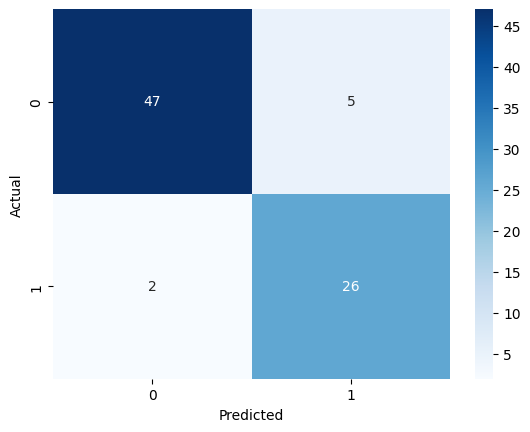

In [ ]:

import seaborn as sns

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

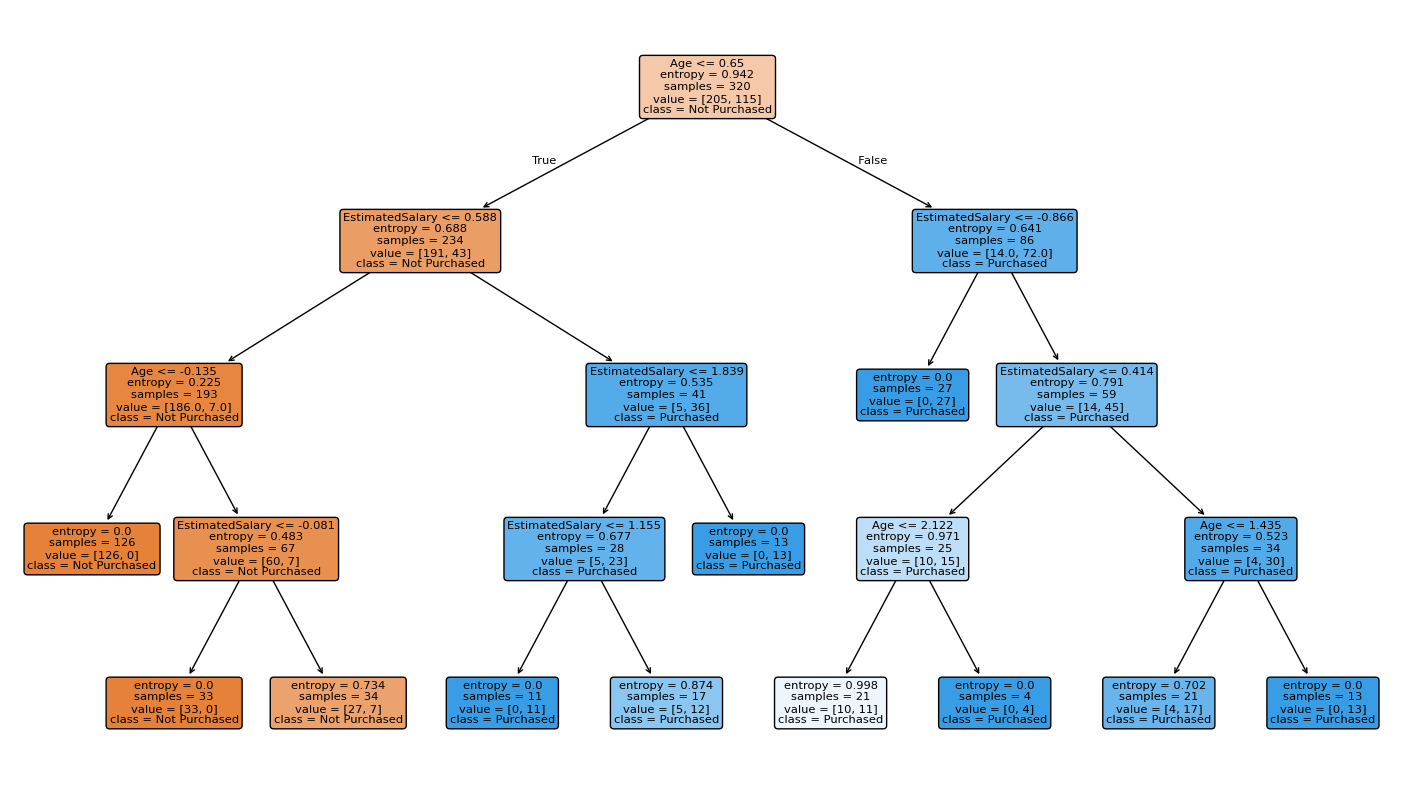

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(18,10))
plot_tree(
    classifier,
    feature_names=['Age', 'EstimatedSalary'],
    class_names=['Not Purchased', 'Purchased'],
    filled=True,
    rounded=True
)
plt.show()